In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from langdetect import detect
import re

In [56]:
raw_data_source_path = '../data/combined 2.csv'
clean_data_detination_path = "../data/clean combined 2.csv"

In [57]:
jobs = pd.read_csv(raw_data_source_path)

In [58]:
jobs.head()

,Unnamed: 0,Title,Link,Company,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills,Size company
0,0,Nhân Viên Xử Lý Dữ Liệu Tiếng Nhật (Tiếng Nhật...,https://www.topcv.vn/viec-lam/nhan-vien-xu-ly-...,CHI NHÁNH CÔNG TY TNHH PASONA TECH VIỆT NAM TẠ...,Thoả thuận,Hà Nội,Nhân viên,Không yêu cầu kinh nghiệm,Toàn thời gian,Không yêu cầu,"- Tốt nghiệp đại học, cao đẳng.\r\n- Tiếng Nhậ...",NaN
1,1,Java Core Backend Developer -Lương Từ 16 - 25 ...,https://www.topcv.vn/brand/congnghiepvienthong...,TẬP ĐOÀN CÔNG NGHIỆP - VIỄN THÔNG QUÂN ĐỘI,16 - 25 triệu,Hà Nội,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,1. Trình độ: Tốt nghiệp đại học loại khá trở l...,NaN
2,2,QC Tester/Manual Tester Tiếng Anh Cơ Bản - Lươ...,https://www.topcv.vn/viec-lam/qc-tester-manual...,Công Ty TNHH Mediastep Software Việt Nam,30 - 43 triệu,Hồ Chí Minh,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,Good at English.At least 2 years hands-on expe...,NaN
3,3,Trưởng Phòng Kỹ Thuật Giải Pháp Lương + Thưởng...,https://www.topcv.vn/viec-lam/truong-phong-ky-...,CÔNG TY TNHH CÔNG NGHỆ VÀ GIẢI PHÁP THÔNG MINH,15 - 30 triệu,Hà Nội,Trưởng/Phó phòng,2 năm,Toàn thời gian,Không yêu cầu,- Nam Tốt nghiệp Đại học chuyên ngành CNTT.\r\...,NaN
4,4,Tester Leader/Trưởng Nhóm Kiểm Thử - Lương Up ...,https://www.topcv.vn/viec-lam/tester-leader-tr...,CÔNG TY TNHH FIVE-STAR E-LEARNING,20 - 25 triệu,Hà Nội,Trưởng nhóm,3 năm,Toàn thời gian,Không yêu cầu,Có ít nhất 3 năm kinh nghiệm Test phần mềm các...,NaN


In [59]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          7049 non-null   int64 
 1   Title               7049 non-null   object
 2   Link                7049 non-null   object
 3   Company             7049 non-null   object
 4   Salary              7049 non-null   object
 5   Locations           7049 non-null   object
 6   Level               6969 non-null   object
 7   Year of Experience  6969 non-null   object
 8   Contract Type       6969 non-null   object
 9   Sex                 6969 non-null   object
 10  Skills              6969 non-null   object
 11  Size company        1427 non-null   object
dtypes: int64(1), object(11)
memory usage: 661.0+ KB


# Làm sạch data

- Xóa 3 cột Title, Link, Company

In [60]:
jobs_cleaning = jobs.drop(columns=['Title', 'Link', 'Company', 'Size company'])
jobs_cleaning.head()

,Unnamed: 0,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills
0,0,Thoả thuận,Hà Nội,Nhân viên,Không yêu cầu kinh nghiệm,Toàn thời gian,Không yêu cầu,"- Tốt nghiệp đại học, cao đẳng.\r\n- Tiếng Nhậ..."
1,1,16 - 25 triệu,Hà Nội,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,1. Trình độ: Tốt nghiệp đại học loại khá trở l...
2,2,30 - 43 triệu,Hồ Chí Minh,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,Good at English.At least 2 years hands-on expe...
3,3,15 - 30 triệu,Hà Nội,Trưởng/Phó phòng,2 năm,Toàn thời gian,Không yêu cầu,- Nam Tốt nghiệp Đại học chuyên ngành CNTT.\r\...
4,4,20 - 25 triệu,Hà Nội,Trưởng nhóm,3 năm,Toàn thời gian,Không yêu cầu,Có ít nhất 3 năm kinh nghiệm Test phần mềm các...


- Xóa những hàng có Skills = null
Vì Skill giá trị null tức là bản ghi đó crawl bị lỗi

In [61]:
print("Trước khi xử lý")
print(jobs_cleaning.count())
jobs_cleaning = jobs_cleaning[jobs_cleaning['Level'].isnull() == False]
print("Sau khi xử lý")
print(jobs_cleaning.count())

Trước khi xử lý
Unnamed: 0            7049
Salary                7049
Locations             7049
Level                 6969
Year of Experience    6969
Contract Type         6969
Sex                   6969
Skills                6969
dtype: int64
Sau khi xử lý
Unnamed: 0            6969
Salary                6969
Locations             6969
Level                 6969
Year of Experience    6969
Contract Type         6969
Sex                   6969
Skills                6969
dtype: int64


- Làm sạch biến Salary

In [62]:
jobs_cleaning = jobs_cleaning[jobs_cleaning['Salary'] != 'Thoả thuận']
jobs_cleaning.head()

,Unnamed: 0,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills
1,1,16 - 25 triệu,Hà Nội,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,1. Trình độ: Tốt nghiệp đại học loại khá trở l...
2,2,30 - 43 triệu,Hồ Chí Minh,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,Good at English.At least 2 years hands-on expe...
3,3,15 - 30 triệu,Hà Nội,Trưởng/Phó phòng,2 năm,Toàn thời gian,Không yêu cầu,- Nam Tốt nghiệp Đại học chuyên ngành CNTT.\r\...
4,4,20 - 25 triệu,Hà Nội,Trưởng nhóm,3 năm,Toàn thời gian,Không yêu cầu,Có ít nhất 3 năm kinh nghiệm Test phần mềm các...
5,5,25 - 35 triệu,Hà Nội,Nhân viên,3 năm,Toàn thời gian,Không yêu cầu,"- Có kiến thức tốt về OOP, Clean architecture,..."


Hàm chuyển chuỗi(tiền) thành số

In [63]:
def str_to_num(str):
    if '.' in str:
        return float(str.replace(',', ''))
    else:
        return int(str.replace(',', ''))

Hàm chuyển tiền mệnh giá USD sang VND

In [64]:
def USD_to_VND(USD_value):
    return USD_value * 23000

Giá trị lương thường có những kiểu sau:

Tới xxx USD

xxx - xxx USD

Tới xxx triệu

xxx - xxx triệu

In [65]:
def analyze_salary(input):
    # Regex pattern
    regex_patternUSD = r'(?<!\d)(\d{1,3}(,\d{3})*|\d+)(\s*-\s*(\d{1,3}(,\d{3})*|\d+))?\s*(USD)?(?!\d)'
    regex_patternVND = r'(?<!\d)(\d{1,3}(.\d)*|\d+)(\s*-\s*(\d{1,3}(.\d)*|\d+))?\s*(triệu)?(?!\d)'

    # Tìm kiếm giá trị số trong chuỗi
    if 'USD' in input:
        matches = re.findall(regex_patternUSD, input)
    elif 'triệu' in input:
        matches = re.findall(regex_patternVND, input)

    # In kết quả tìm thấy
    if matches:
        value = 0
        for match in matches:
            value += str_to_num(match[0])
            if match[3]:
                value += str_to_num(match[3])
                value /= 2
            if (match[-1] == 'USD'):
                value = USD_to_VND(value)
            else:
                value *= 1000000
        return value
    else:
        return -1

In [66]:
jobs_cleaning['Salary'] = jobs_cleaning['Salary'].apply(analyze_salary)

UnboundLocalError: local variable 'matches' referenced before assignment

Trước khi loại bỏ các giá trị ngoại lệ

<Figure size 200x600 with 0 Axes>

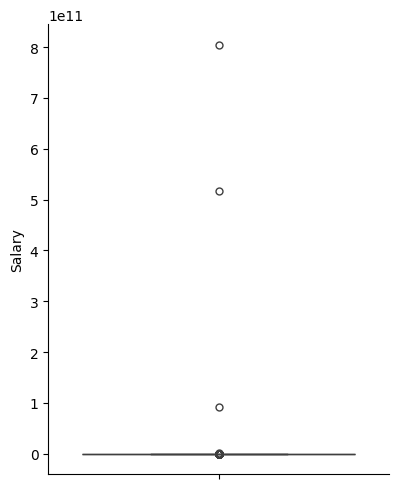

In [ ]:
plt.figure(figsize=(2, 6))
sns.catplot(jobs_cleaning, y="Salary", aspect=0.8, kind="box")

In [ ]:
# Top 10 mức lương cao nhất
top_10_salary = pd.DataFrame(jobs_cleaning['Salary']).nlargest(10, 'Salary')
top_10_salary

,Salary
941,8.050000e+11
1336,5.175000e+11
1082,9.200000e+10
1034,5.750000e+08
191,9.200000e+07
701,9.200000e+07
537,8.500000e+07
935,8.050000e+07
3776,8.050000e+07
1428,8.000000e+07


In [ ]:
# Top 10 mức lương thấp nhất
top_10_salary = pd.DataFrame(jobs_cleaning['Salary']).nsmallest(10, 'Salary')
top_10_salary

,Salary
250,0.0
894,0.0
936,0.0
938,0.0
1896,0.0
4441,0.0
4601,0.0
4481,950000.0
714,1000000.0
781,1000000.0


In [ ]:
def valid_salary(salary):
    if salary == 0 or salary > 100000000:
        return False
    return True

In [ ]:
jobs_cleaning = jobs_cleaning[jobs_cleaning['Salary'].apply(valid_salary)]

<Figure size 200x600 with 0 Axes>

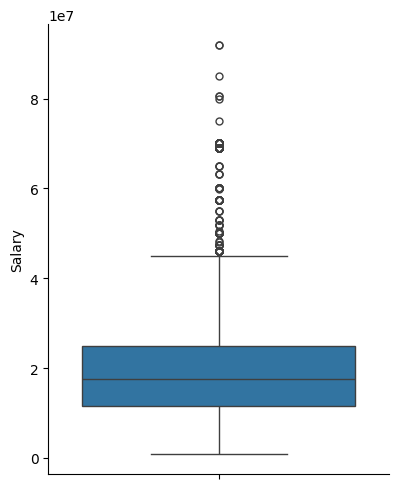

In [ ]:
plt.figure(figsize=(2, 6))
sns.catplot(jobs_cleaning, y="Salary", aspect=0.8, kind="box")

Loại bỏ các giá trị Salary ngoại lệ

In [ ]:
# Xử lý ngoại lệ biến Salary
Q1 = jobs_cleaning['Salary'].quantile(0.3)
Q3 = jobs_cleaning['Salary'].quantile(0.7)
IQR = Q3 - Q1

jobs_cleaning = jobs_cleaning[(jobs_cleaning['Salary'] >= (Q1 - 1.5 * IQR)) & (jobs_cleaning['Salary'] <= (Q3 + 1.5 * IQR))]
jobs_cleaning = jobs_cleaning[jobs_cleaning['Salary'] > 0]

Sau khi loại bỏ các giá trị Salary ngoại lệ

<Figure size 200x600 with 0 Axes>

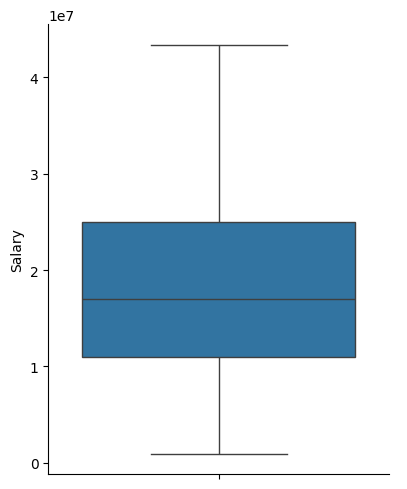

In [ ]:
plt.figure(figsize=(2, 6))
sns.catplot(jobs_cleaning, y="Salary", aspect=0.8, kind="box")

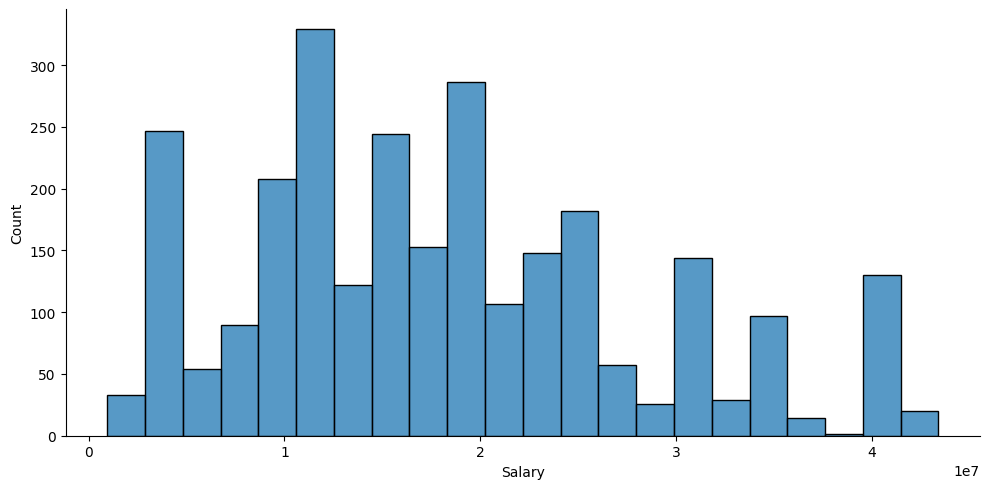

In [ ]:
sns.displot(jobs_cleaning, x="Salary", height=5, aspect=2)

Mức 'Salary' sau khi được làm sạch, dữ liệu không còn là loại danh mục mà là miền giá trị liên tục

- Xác định ngôn ngữ lập trình 'Programming Languages' được yêu cầu cho 1 công việc

In [ ]:
programing_languages = ['C#', 'Java', 'C++', 'C', 'Javascript', 'Python', 'PHP', 'Kotlin', 'Dart', 'TypeScript']

In [ ]:
def analyze_programing_language(text):
    # Kiểm tra nếu giá trị là chuỗi
    if isinstance(text, str):
        # Tạo một biểu thức chính quy từ danh sách các ngôn ngữ lập trình
        regex_pattern = r'(?<!\w)(?:' + '|'.join(re.escape(lang.lower()) for lang in programing_languages) + r')(?!\w)'

        # Tìm kiếm các ngôn ngữ lập trình trong văn bản đầu vào và duy trì thứ tự xuất hiện
        matches = re.findall(regex_pattern, text.lower())

        # Trả về các ngôn ngữ lập trình tìm thấy
        unique_matches = list(set(matches))
        
        return unique_matches
    else:
        return []

In [ ]:
jobs_cleaning['Programming Languages'] = jobs_cleaning['Skills'].apply(analyze_programing_language)
jobs_cleaning.head()

,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills,Programming Languages
1,20500000.0,Hà Nội,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,1. Trình độ: Tốt nghiệp đại học loại khá trở l...,[java]
2,36500000.0,Hồ Chí Minh,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,Good at English.At least 2 years hands-on expe...,[]
3,22500000.0,Hà Nội,Trưởng/Phó phòng,2 năm,Toàn thời gian,Không yêu cầu,- Nam Tốt nghiệp Đại học chuyên ngành CNTT.\r\...,[]
4,22500000.0,Hà Nội,Trưởng nhóm,3 năm,Toàn thời gian,Không yêu cầu,Có ít nhất 3 năm kinh nghiệm Test phần mềm các...,[]
5,30000000.0,Hà Nội,Nhân viên,3 năm,Toàn thời gian,Không yêu cầu,"- Có kiến thức tốt về OOP, Clean architecture,...","[php, typescript, javascript]"


- Xác định ngoại ngữ 'Language' được yêu câu cho 1 công việc

In [ ]:
languages = ['Tiếng Anh', 'Tiếng Nhật', 'Japanese', 'English']

In [ ]:
def analyze_language(text):
    # Kiểm tra nếu giá trị là chuỗi
    if isinstance(text, str):
        # Tạo một biểu thức chính quy từ danh sách các ngôn ngữ
        regex_pattern = r'(?<!\w)(?:' + '|'.join(re.escape(lang.lower()) for lang in languages) + r')(?!\w)'

        # Tìm kiếm các ngôn ngữ trong văn bản đầu vào và duy trì thứ tự xuất hiện
        matches = re.findall(regex_pattern, text.lower())

        # Trả về các ngôn ngữ tìm thấy
        unique_matches = list(set(matches))

        if 'japanese' in unique_matches:
            unique_matches.remove('japanese')
            unique_matches.append('tiếng nhật')
        if 'english' in unique_matches:
            unique_matches.remove('english')
            unique_matches.append('tiếng anh')
        
        return unique_matches
    else:
        return []

In [ ]:
jobs_cleaning['Languages'] = jobs_cleaning['Skills'].apply(analyze_language)
jobs_cleaning.head()

,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills,Programming Languages,Languages
1,20500000.0,Hà Nội,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,1. Trình độ: Tốt nghiệp đại học loại khá trở l...,[java],[tiếng anh]
2,36500000.0,Hồ Chí Minh,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,Good at English.At least 2 years hands-on expe...,[],[tiếng anh]
3,22500000.0,Hà Nội,Trưởng/Phó phòng,2 năm,Toàn thời gian,Không yêu cầu,- Nam Tốt nghiệp Đại học chuyên ngành CNTT.\r\...,[],[]
4,22500000.0,Hà Nội,Trưởng nhóm,3 năm,Toàn thời gian,Không yêu cầu,Có ít nhất 3 năm kinh nghiệm Test phần mềm các...,[],[]
5,30000000.0,Hà Nội,Nhân viên,3 năm,Toàn thời gian,Không yêu cầu,"- Có kiến thức tốt về OOP, Clean architecture,...","[php, typescript, javascript]",[]


- Tách dữ liệu đa biến thành đơn biến

In [ ]:
def array_to_single_value(column_name, new_column_name, value_other):
    # Tạo một DataFrame mới để chứa các bản ghi đã tách
    new_rows = []

    # Duyệt qua các hàng trong DataFrame hiện tại
    for index, row in jobs_cleaning.iterrows():
        skills = row[column_name]
        if isinstance(skills, list):
            if skills.__len__() == 0:
                new_row = row.copy()
                new_row[new_column_name] = value_other
                new_row.pop(column_name)
                new_rows.append(new_row)
            else:
                for skill in skills:
                    new_row = row.copy()
                    new_row[new_column_name] = skill
                    new_row.pop(column_name)
                    new_rows.append(new_row)

    # Tạo DataFrame mới từ danh sách các bản ghi đã tách
    return pd.DataFrame(new_rows)

Đối với ngôn ngữ lập trình

In [ ]:
jobs_cleaning = array_to_single_value('Programming Languages', 'Programming Language', 'Khác')
jobs_cleaning.head()

,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills,Languages,Programming Language
1,20500000.0,Hà Nội,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,1. Trình độ: Tốt nghiệp đại học loại khá trở l...,[tiếng anh],java
2,36500000.0,Hồ Chí Minh,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,Good at English.At least 2 years hands-on expe...,[tiếng anh],Khác
3,22500000.0,Hà Nội,Trưởng/Phó phòng,2 năm,Toàn thời gian,Không yêu cầu,- Nam Tốt nghiệp Đại học chuyên ngành CNTT.\r\...,[],Khác
4,22500000.0,Hà Nội,Trưởng nhóm,3 năm,Toàn thời gian,Không yêu cầu,Có ít nhất 3 năm kinh nghiệm Test phần mềm các...,[],Khác
5,30000000.0,Hà Nội,Nhân viên,3 năm,Toàn thời gian,Không yêu cầu,"- Có kiến thức tốt về OOP, Clean architecture,...",[],php


Đối với ngoại ngữ

In [ ]:
jobs_cleaning = array_to_single_value('Languages', 'Language', 'Không yêu cầu')
jobs_cleaning.head()

,Salary,Locations,Level,Year of Experience,Contract Type,Sex,Skills,Programming Language,Language
1,20500000.0,Hà Nội,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,1. Trình độ: Tốt nghiệp đại học loại khá trở l...,java,tiếng anh
2,36500000.0,Hồ Chí Minh,Nhân viên,2 năm,Toàn thời gian,Không yêu cầu,Good at English.At least 2 years hands-on expe...,Khác,tiếng anh
3,22500000.0,Hà Nội,Trưởng/Phó phòng,2 năm,Toàn thời gian,Không yêu cầu,- Nam Tốt nghiệp Đại học chuyên ngành CNTT.\r\...,Khác,Không yêu cầu
4,22500000.0,Hà Nội,Trưởng nhóm,3 năm,Toàn thời gian,Không yêu cầu,Có ít nhất 3 năm kinh nghiệm Test phần mềm các...,Khác,Không yêu cầu
5,30000000.0,Hà Nội,Nhân viên,3 năm,Toàn thời gian,Không yêu cầu,"- Có kiến thức tốt về OOP, Clean architecture,...",php,Không yêu cầu


- Sau khi tách đa biến thành đơn biến

Đối với ngôn ngữ lập trình

C:\Users\TUAN\AppData\Local\Temp\ipykernel_10076\502853134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Programming Language', data=jobs_cleaning.explode('Programming Language'),


Programming Language
Khác          1761
javascript     392
java           371
python         198
c#             123
c              118
php            110
typescript      76
c++             70
kotlin          41
dart             7
Name: count, dtype: int64


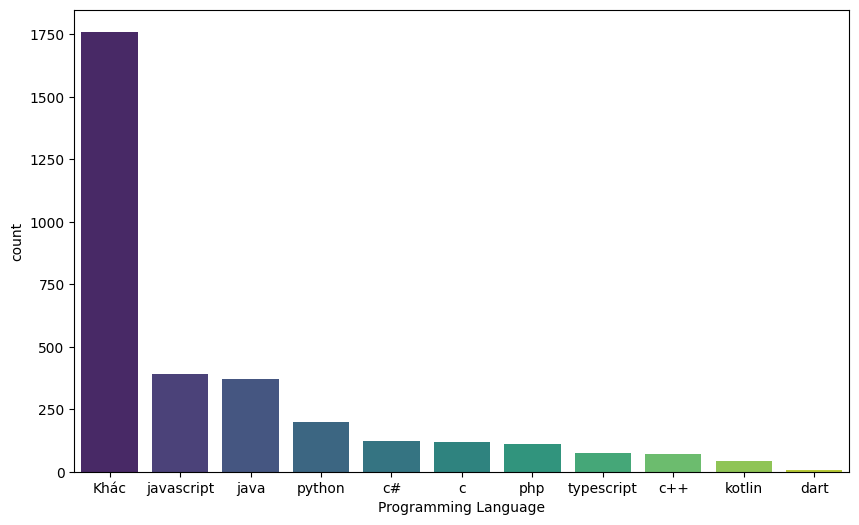

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Programming Language', data=jobs_cleaning.explode('Programming Language'), 
    order=jobs_cleaning['Programming Language'].value_counts().index, palette='viridis')

print(jobs_cleaning['Programming Language'].value_counts())

Đối với ngoại ngữ

Language
Không yêu cầu    2020
tiếng anh        1139
tiếng nhật        108
Name: count, dtype: int64


C:\Users\TUAN\AppData\Local\Temp\ipykernel_10076\2794450201.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Language', data=jobs_cleaning.explode('Language'),


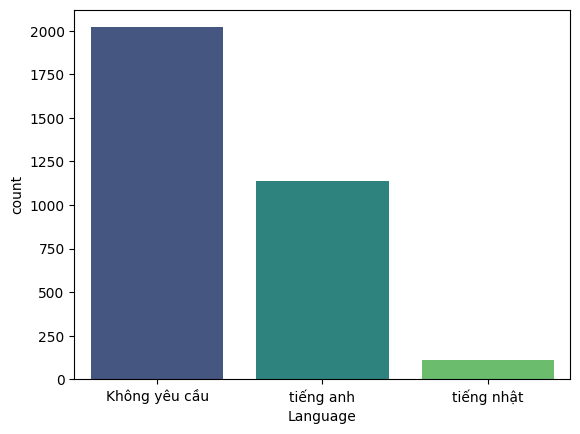

In [ ]:
sns.countplot(x='Language', data=jobs_cleaning.explode('Language'), 
    order=jobs_cleaning['Language'].explode().value_counts().index, palette='viridis')

print(jobs_cleaning['Language'].value_counts())

- Detect ngôn ngữ được sử dụng để viết về bài tuyển dụng

In [ ]:
def detect_language(text):
    try:
        language = detect(text)
        if language == 'en':
            return "en"
        elif language == 'vi':
            return "vi"
        else:
            return "other"
    except Exception as e:
        return "Unknown"

In [ ]:
jobs_cleaning['Lang'] = jobs_cleaning['Skills'].apply(detect_language)

- Sau khi không sử dụng cột 'Skills' nữa, xóa chúng đi

In [ ]:
jobs_cleaning = jobs_cleaning.drop(columns=['Skills'])

- Chuyển 'Locations' thành dữ liệu đơn

<Axes: xlabel='Locations', ylabel='count'>

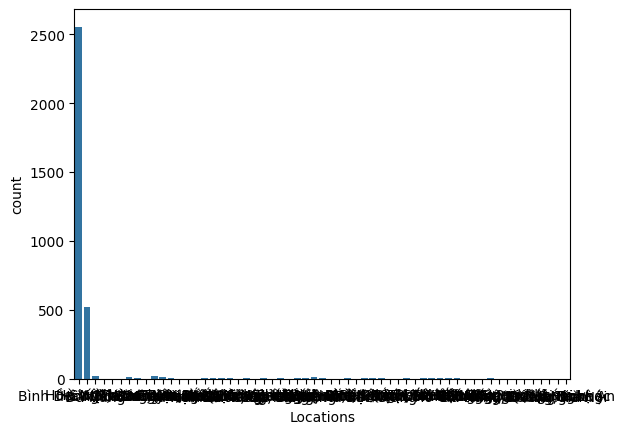

In [ ]:
sns.countplot(x='Locations', data=jobs_cleaning)

'Locations' là biến kiểu dữ liệu hạng mục, một vài hạng mục xuất hiện quá ít trong dữ liệu

Chọn 3 thành phố lớn là dữ hiệu hạng mục cho biến Location, trường hợp còn lại cho thành biến 'Khác'

In [ ]:
jobs_cleaning['Location'] = jobs_cleaning['Locations'].apply(lambda l: l if l in ['Hà Nội', 'Đà Nẵng', 'Hồ Chí Minh'] else 'Khác')
jobs_cleaning = jobs_cleaning.drop(columns=['Locations'])

<Axes: xlabel='Location', ylabel='count'>

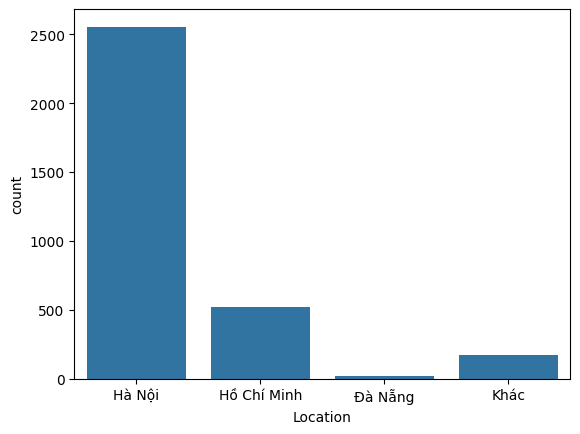

In [ ]:
sns.countplot(x='Location', data=jobs_cleaning)

- Các cột còn lại sau khi làm sạch dữ liệu

In [ ]:
jobs_cleaning['Level'].unique()

array(['Nhân viên', 'Trưởng/Phó phòng', 'Trưởng nhóm', 'Thực tập sinh',
       'Quản lý / Giám sát', 'Giám đốc'], dtype=object)

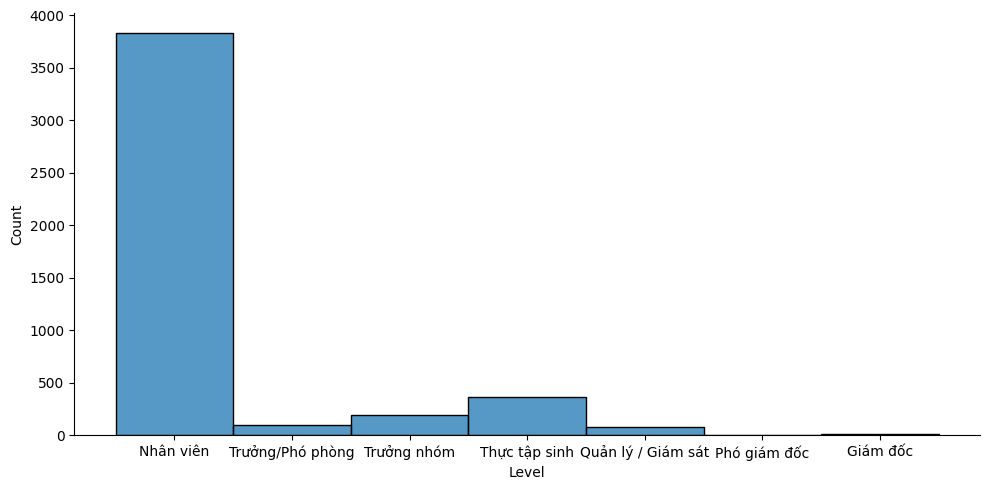

In [ ]:
sns.displot(jobs, x="Level", kind="hist", height=5, aspect=2)

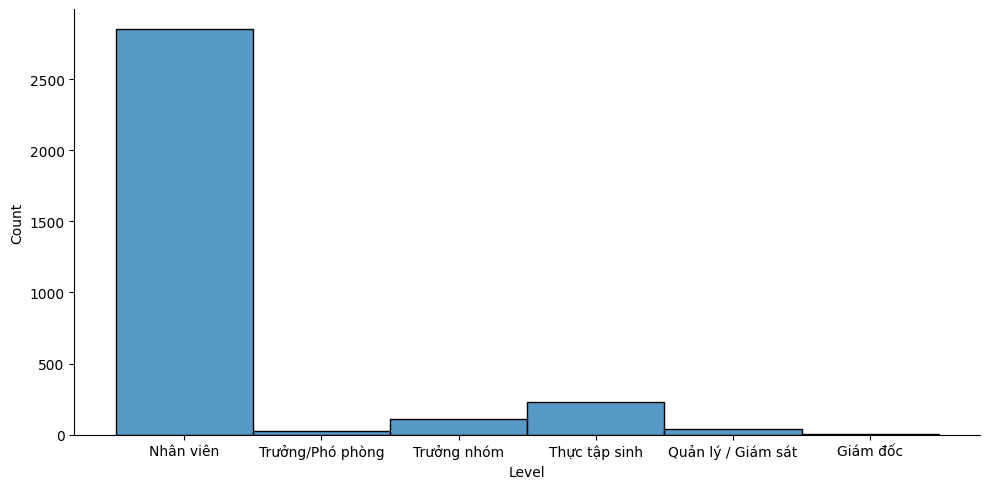

In [ ]:
sns.displot(jobs_cleaning, x="Level", kind="hist", height=5, aspect=2)

<Axes: xlabel='Level'>

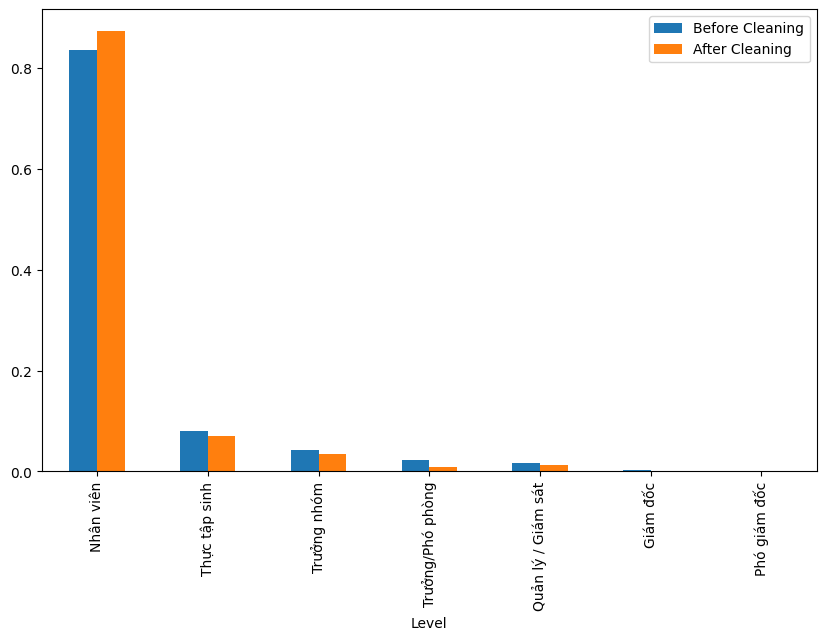

In [ ]:
level = jobs['Level'].value_counts()
level_new = jobs_cleaning['Level'].value_counts()

level_ratio = level / level.sum()
level_new_ratio = level_new / level_new.sum()

df = pd.DataFrame(data=[level_ratio, level_new_ratio], index=['Before Cleaning', 'After Cleaning'])
df = df.T

df.plot(kind='bar', figsize=(10, 6))

In [ ]:
jobs_cleaning['Contract Type'].unique()

array(['Toàn thời gian', 'Bán thời gian', 'Thực tập'], dtype=object)

                Contract Type  Contract Type After Cleaning
Contract Type                                              
Toàn thời gian           4481                          3206
Thực tập                   76                            42
Bán thời gian              31                            19


<Axes: xlabel='Contract Type', ylabel='Số lượng'>

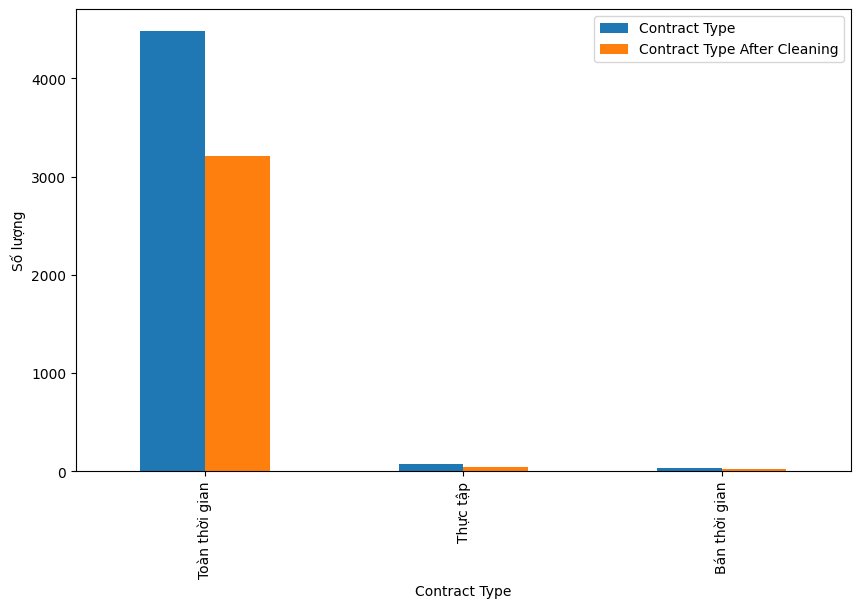

In [ ]:
contract_type = jobs['Contract Type'].value_counts()
contract_type_new = jobs_cleaning['Contract Type'].value_counts()

df = pd.DataFrame(data=[contract_type, contract_type_new], index=['Contract Type', 'Contract Type After Cleaning'])
df = df.T
print(df)

df.plot(kind='bar', ylabel='Số lượng',  figsize=(10, 6))

<Axes: xlabel='Contract Type'>

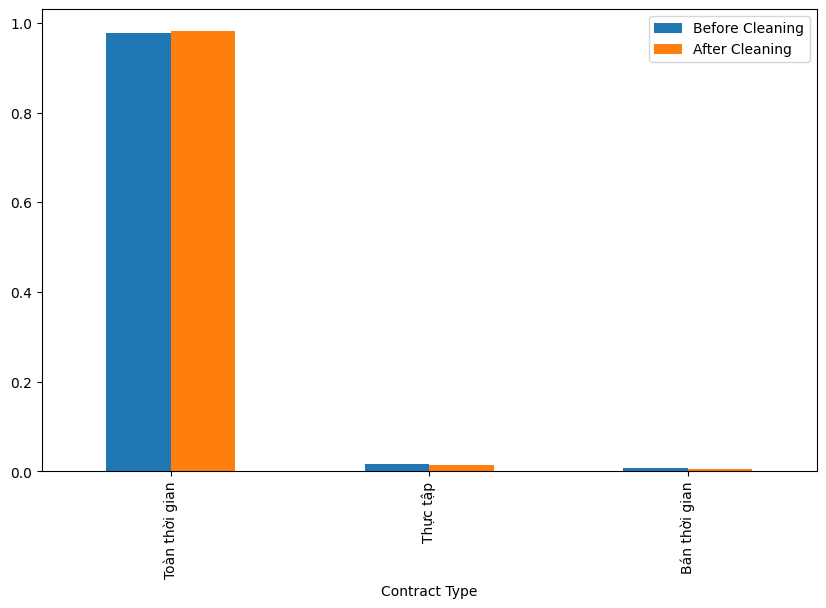

In [ ]:
contract_type_ratio = contract_type / contract_type.sum()
contract_type_new_ratio = contract_type_new / contract_type_new.sum()

df = pd.DataFrame(data=[contract_type_ratio, contract_type_new_ratio], index=['Before Cleaning', 'After Cleaning'])
df = df.T

df.plot(kind='bar', figsize=(10, 6))

In [ ]:
jobs_cleaning['Year of Experience'].unique()

array(['2 năm', '3 năm', 'Không yêu cầu kinh nghiệm', '1 năm',
       'Dưới 1 năm', '5 năm', '4 năm', 'Trên 5 năm'], dtype=object)

In [ ]:
year_of_experience_index = np.array(['Không yêu cầu kinh nghiệm', 'Dưới 1 năm', '1 năm', '2 năm', '3 năm', '4 năm', '5 năm', 'Trên 5 năm'])

                           Year of Experience  \
Year of Experience                              
Không yêu cầu kinh nghiệm                 922   
Dưới 1 năm                                353   
1 năm                                    1003   
2 năm                                     980   
3 năm                                     810   
4 năm                                     230   
5 năm                                     219   
Trên 5 năm                                 71   

                           Year of Experience After Cleaning  
Year of Experience                                            
Không yêu cầu kinh nghiệm                                686  
Dưới 1 năm                                               316  
1 năm                                                    751  
2 năm                                                    810  
3 năm                                                    537  
4 năm                                                     83  
5 năm

<Axes: xlabel='Year of Experience', ylabel='Số lượng'>

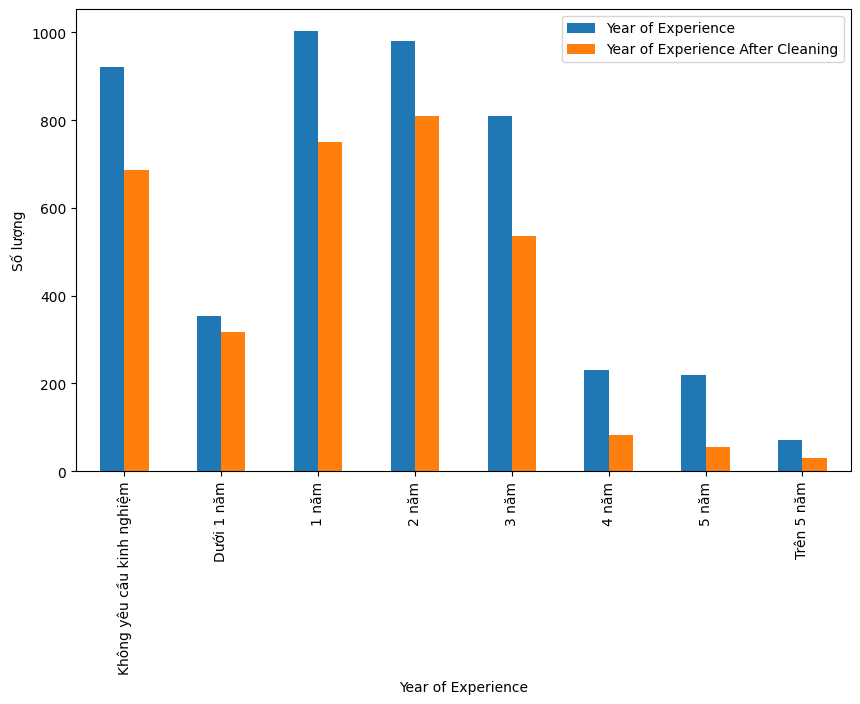

In [ ]:
year_of_experience = jobs['Year of Experience'].value_counts().reindex(year_of_experience_index)
year_of_experience_new = jobs_cleaning['Year of Experience'].value_counts().reindex(year_of_experience_index)

df = pd.DataFrame(data=[year_of_experience, year_of_experience_new], index=['Year of Experience', 'Year of Experience After Cleaning'])
df = df.T
print(df)

df.plot(kind='bar', ylabel='Số lượng',  figsize=(10, 6))

<Axes: xlabel='Year of Experience', ylabel='Tỉ lệ'>

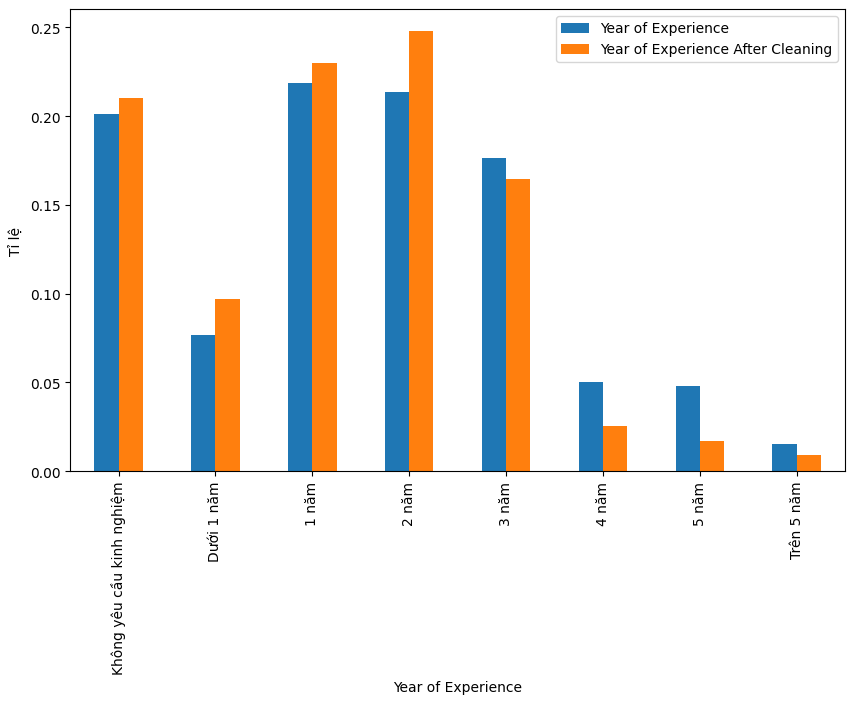

In [ ]:
# Tính tỉ lệ của từng nhóm trong dữ liệu gốc
experience_ratio = year_of_experience / year_of_experience.sum()

# Tính tỉ lệ của từng nhóm trong dữ liệu sau khi làm sạch
experience_new_ratio = year_of_experience_new / year_of_experience_new.sum()

# Tạo DataFrame mới chứa tỉ lệ
df_ratio = pd.DataFrame({'Year of Experience': experience_ratio, 'Year of Experience After Cleaning': experience_new_ratio})

# Vẽ biểu đồ cột
df_ratio.plot(kind='bar', ylabel='Tỉ lệ', figsize=(10, 6))

<Axes: xlabel='Sex', ylabel='Số lượng'>

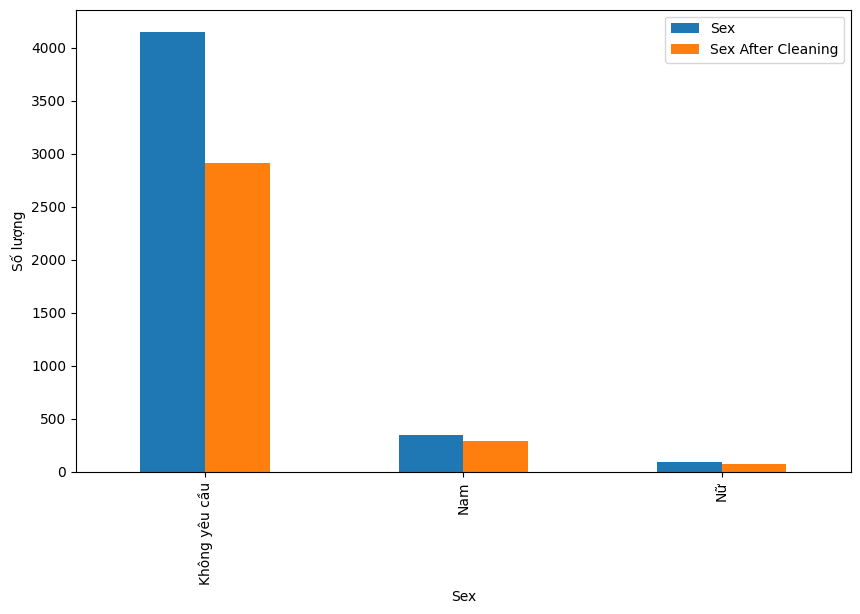

In [ ]:
sex = jobs['Sex'].value_counts()
sex_new = jobs_cleaning['Sex'].value_counts()

df = pd.DataFrame(data=[sex, sex_new], index=['Sex', 'Sex After Cleaning'])
df = df.T

df.plot(kind='bar', ylabel='Số lượng',  figsize=(10, 6))

<Axes: xlabel='Sex', ylabel='Tỉ lệ'>

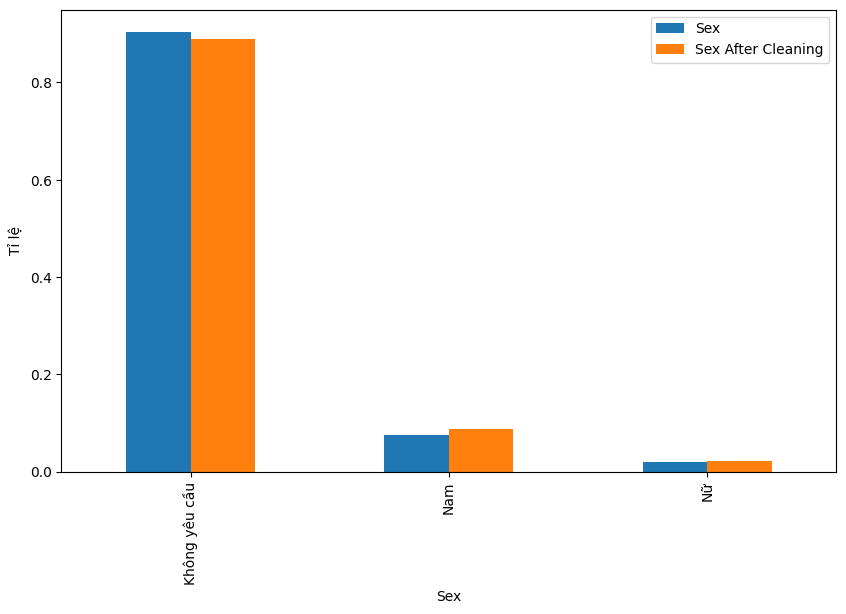

In [ ]:
# Tính tỉ lệ của từng nhóm trong dữ liệu gốc
sex_ratio = sex / sex.sum()

# Tính tỉ lệ của từng nhóm trong dữ liệu sau khi làm sạch
sex_new_ratio = sex_new / sex_new.sum()

# Tạo DataFrame mới chứa tỉ lệ
df_ratio = pd.DataFrame({'Sex': sex_ratio, 'Sex After Cleaning': sex_new_ratio})

# Vẽ biểu đồ cột
df_ratio.plot(kind='bar', ylabel='Tỉ lệ', figsize=(10, 6))

Những biến mà không được làm sạch hoặc chuẩn hóa lên biến đó thì kích thước thay đổi trước và sau do có mở rộng và xóa đi những mẫu. Tuy nhiên tỉ lệ của các nhãn không thay đổi nhiều

- Sau khi làm sạch lưu vào file csv

In [ ]:
# jobs_cleaning = jobs_cleaning.drop(columns=['Unnamed: 0'])

In [ ]:
# jobs_cleaning.to_csv(clean_data_detination_path, index=False)

In [ ]:
jobs_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3267 entries, 1 to 4612
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Salary                3267 non-null   float64
 1   Level                 3267 non-null   object 
 2   Year of Experience    3267 non-null   object 
 3   Contract Type         3267 non-null   object 
 4   Sex                   3267 non-null   object 
 5   Programming Language  3267 non-null   object 
 6   Language              3267 non-null   object 
 7   Lang                  3267 non-null   object 
 8   Location              3267 non-null   object 
dtypes: float64(1), object(8)
memory usage: 384.3+ KB
